In [84]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

plt.style.use('ggplot')

In [85]:
import imblearn
from imblearn.over_sampling import SMOTE
from collections import Counter

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import xgboost
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, plot_confusion_matrix, f1_score, recall_score,classification_report

In [86]:
df = pd.read_csv("BC.csv")


In [87]:
df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Data Preprocessing

In [88]:
df.shape

(569, 33)

In [89]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [90]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

As ID column doesn't impact in the prediction of the breast cancer we can drop the column and Unnamed:32 is having missing columns so, that column is dropped.

In [91]:
df.drop(['id', 'Unnamed: 32'], axis = 1, inplace = True)


In [92]:
df.shape

(569, 31)

In [93]:
df.diagnosis.unique()

array(['M', 'B'], dtype=object)

Diagnosis (M = Malignant, B = Benign) and label encoding (M=1 & B=0) is performed.

In [94]:
df['diagnosis'] = df['diagnosis'].apply(lambda val: 1 if val == 'M' else 0)


In [95]:
df.diagnosis.unique()

array([1, 0])

In [96]:
df.describe()


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [97]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [98]:
df.duplicated().sum()

0

Benign: 62.741652021089635%
Malignant: 37.258347978910365%



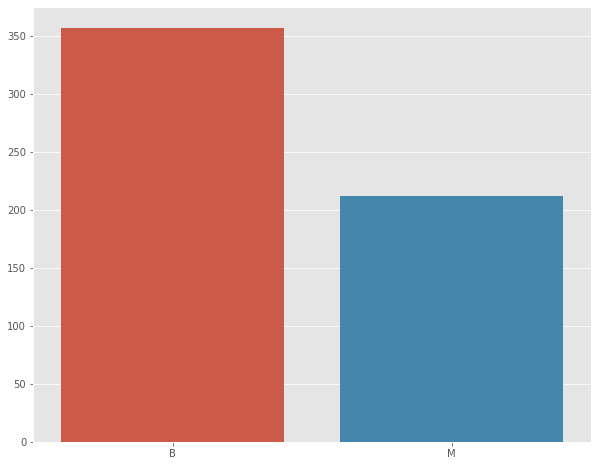

In [99]:
counts = df["diagnosis"].value_counts()
diag_cols = ["B", "M"]
diag_counts = [counts[0], counts[1]]

benign = (diag_counts[0] / sum(diag_counts))*100
malignant = (diag_counts[1] / sum(diag_counts)) * 100

print(f"Benign: {benign}%")
print(f"Malignant: {malignant}%")

print()

plt.figure(figsize = (10, 8))
sns.barplot(x = diag_cols, y = diag_counts)
plt.show()

Almost 37% of the total data belong to Malignant Class and 63% belong to Benign class. We can balance this data using Upsampling.

Univariate Analysis

In [100]:
all_columns = list(df.columns)


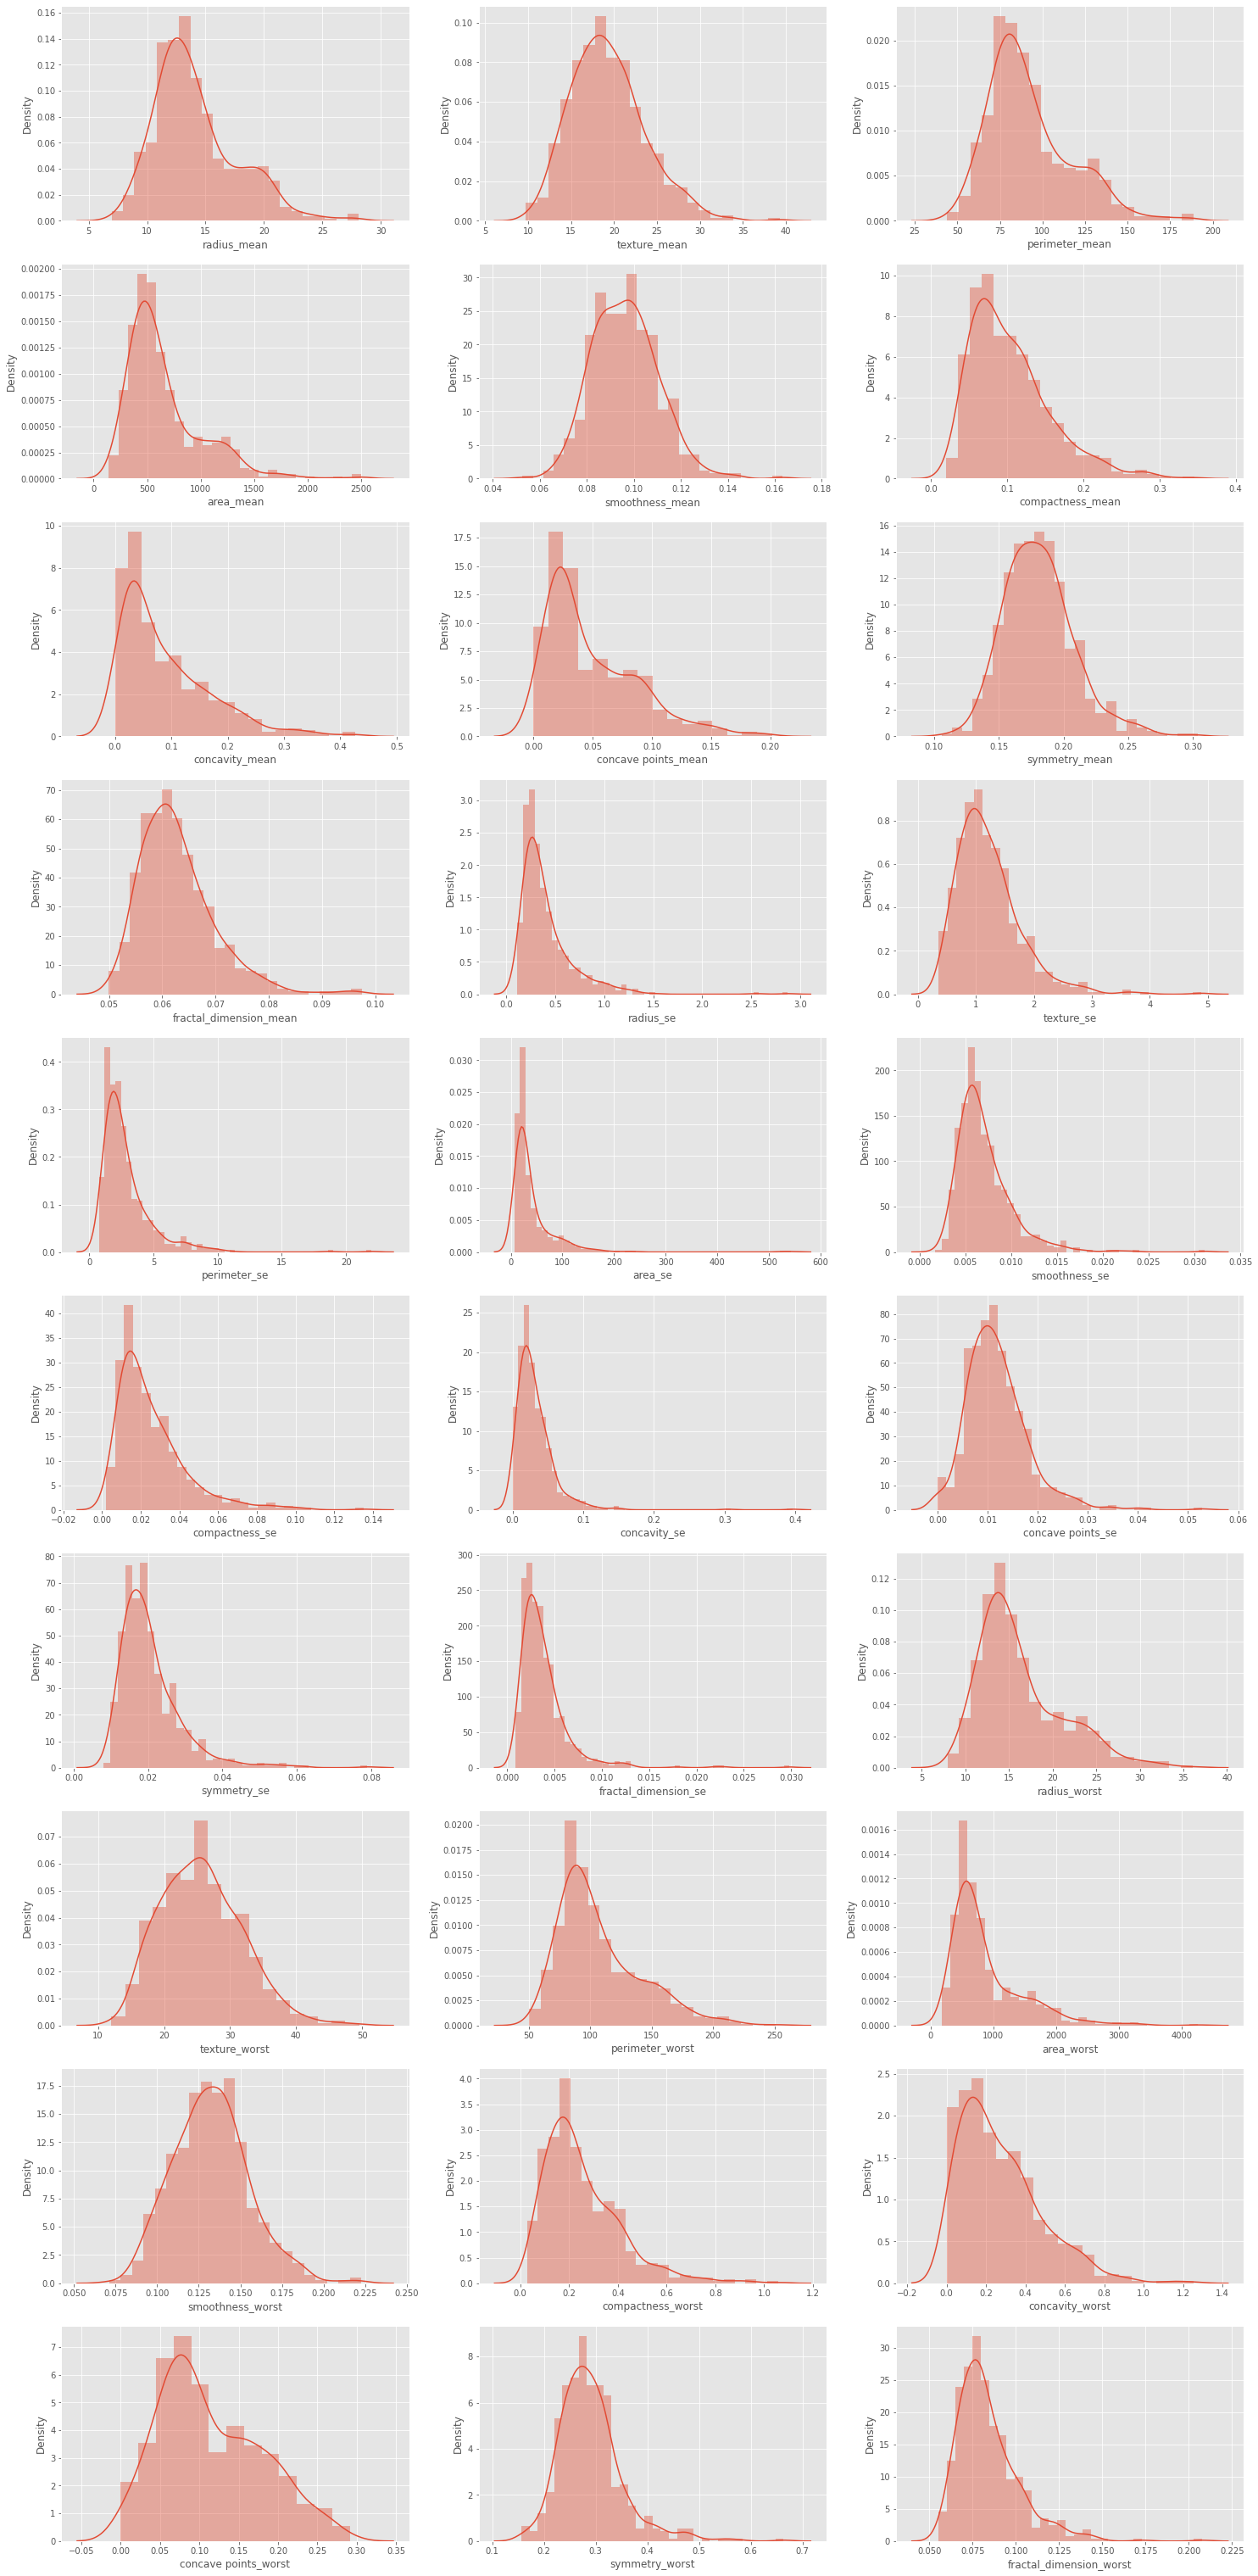

In [101]:
plt.figure(figsize = (25,55))
cols = all_columns[1:]
for i in range(30):
    plt.subplot(10, 3, i+1)
    sns.distplot(df[cols[i]])
plt.show()

To check if there are any outliers in the data

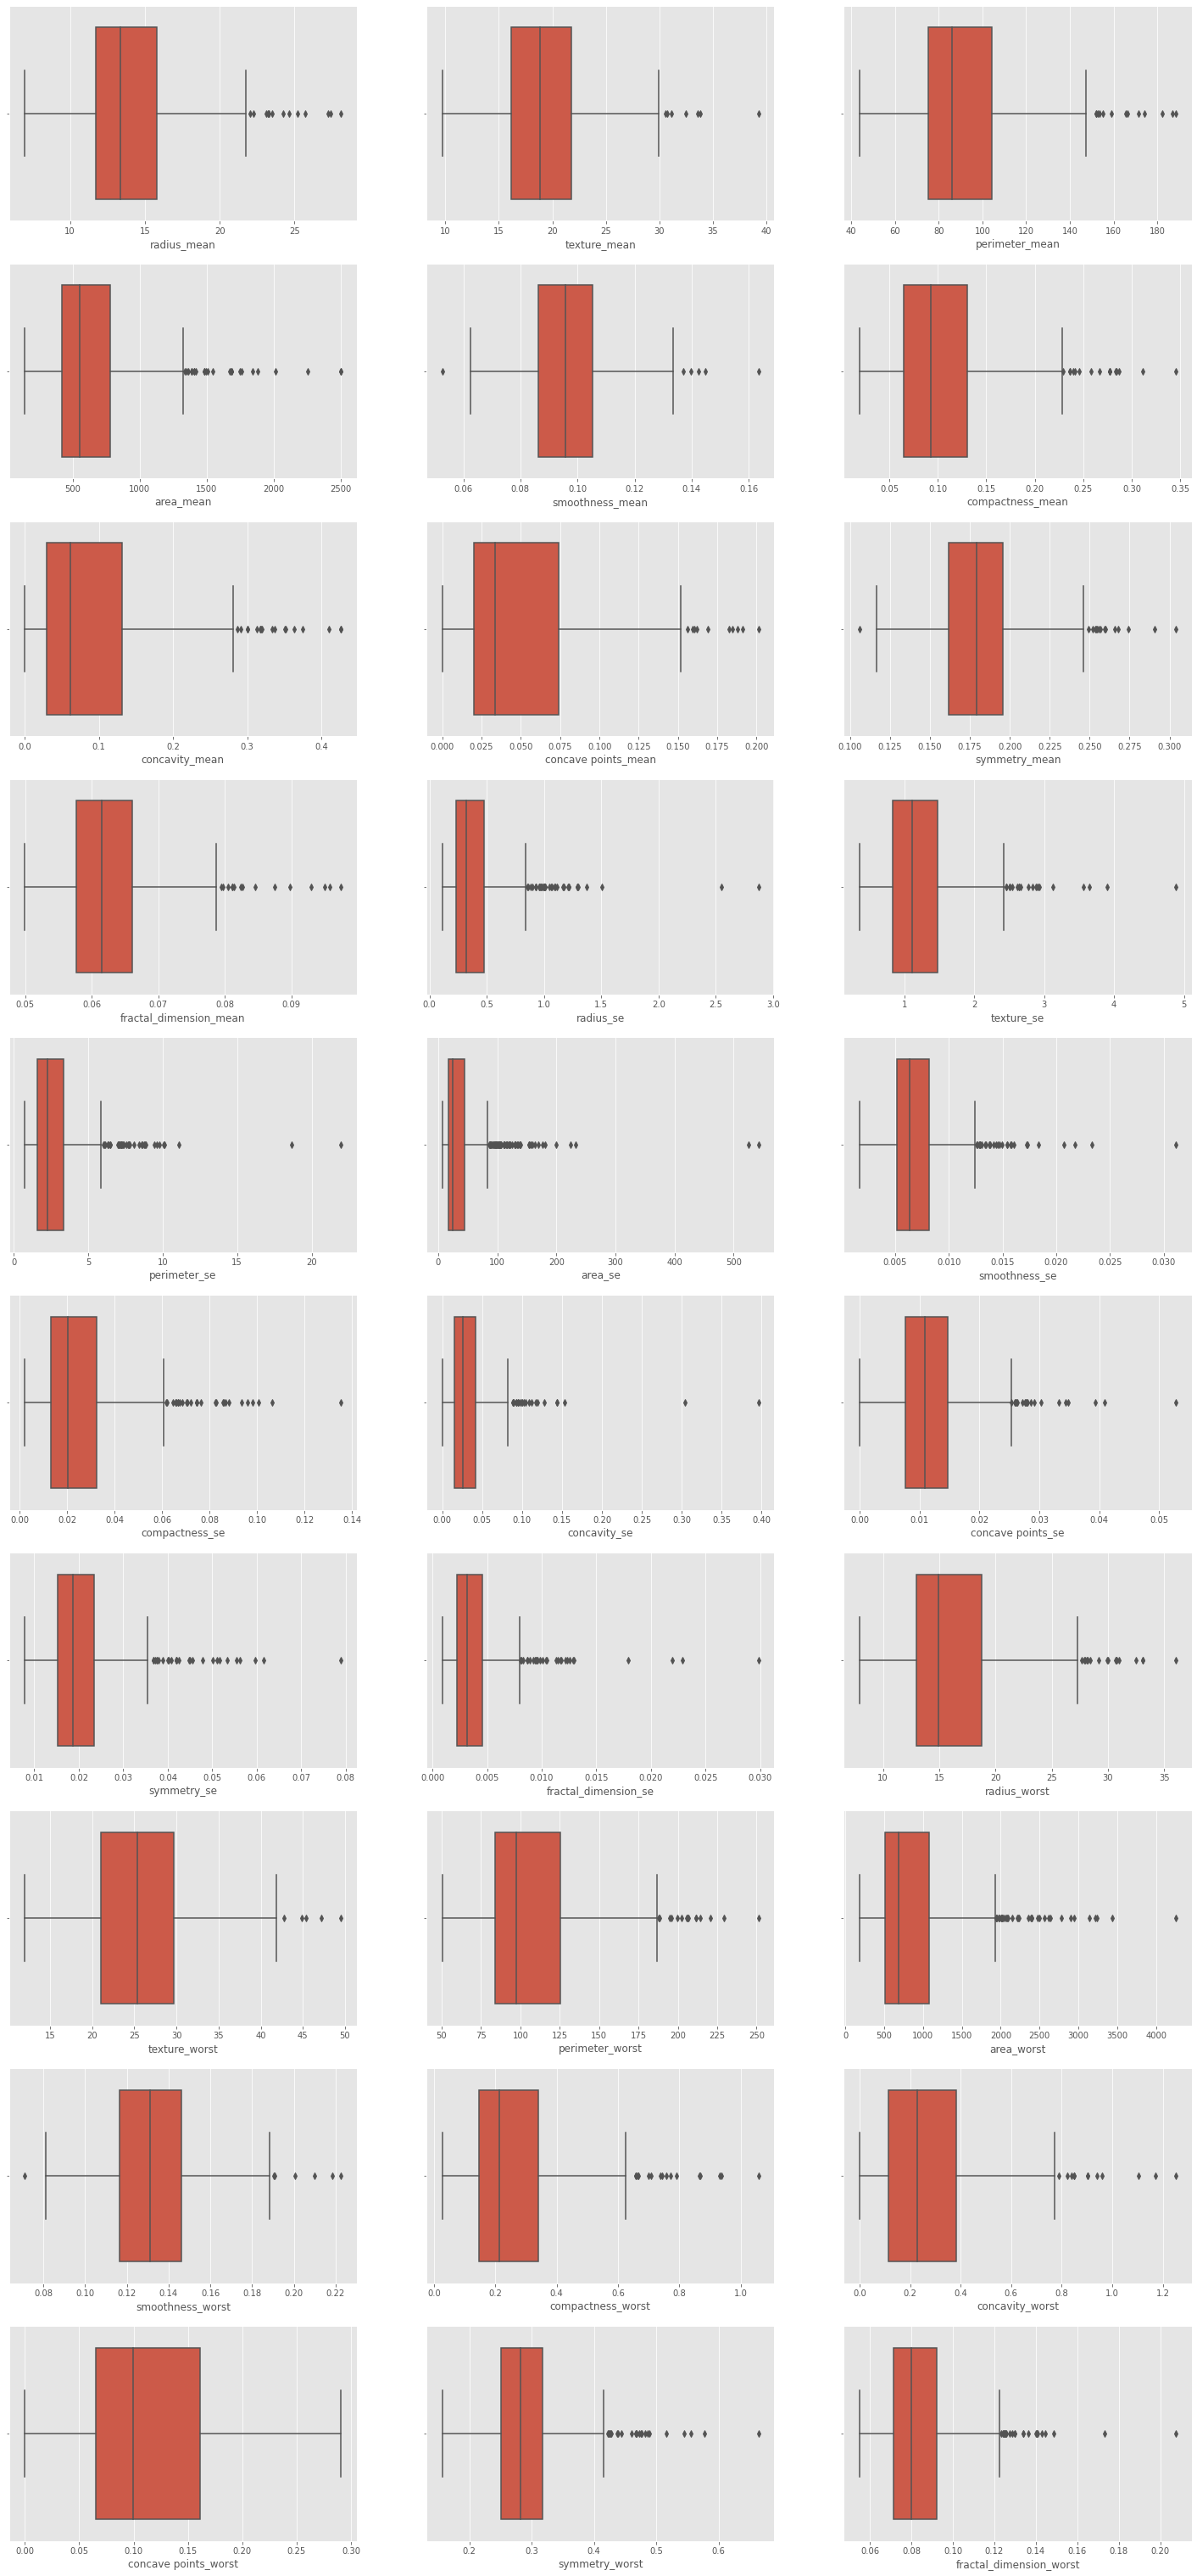

In [102]:
plt.figure(figsize = (25,55))
cols = all_columns[1:]
for i in range(30):
    plt.subplot(10, 3, i+1)
    sns.boxplot(df[cols[i]])
plt.show()

Bivariate Analysis

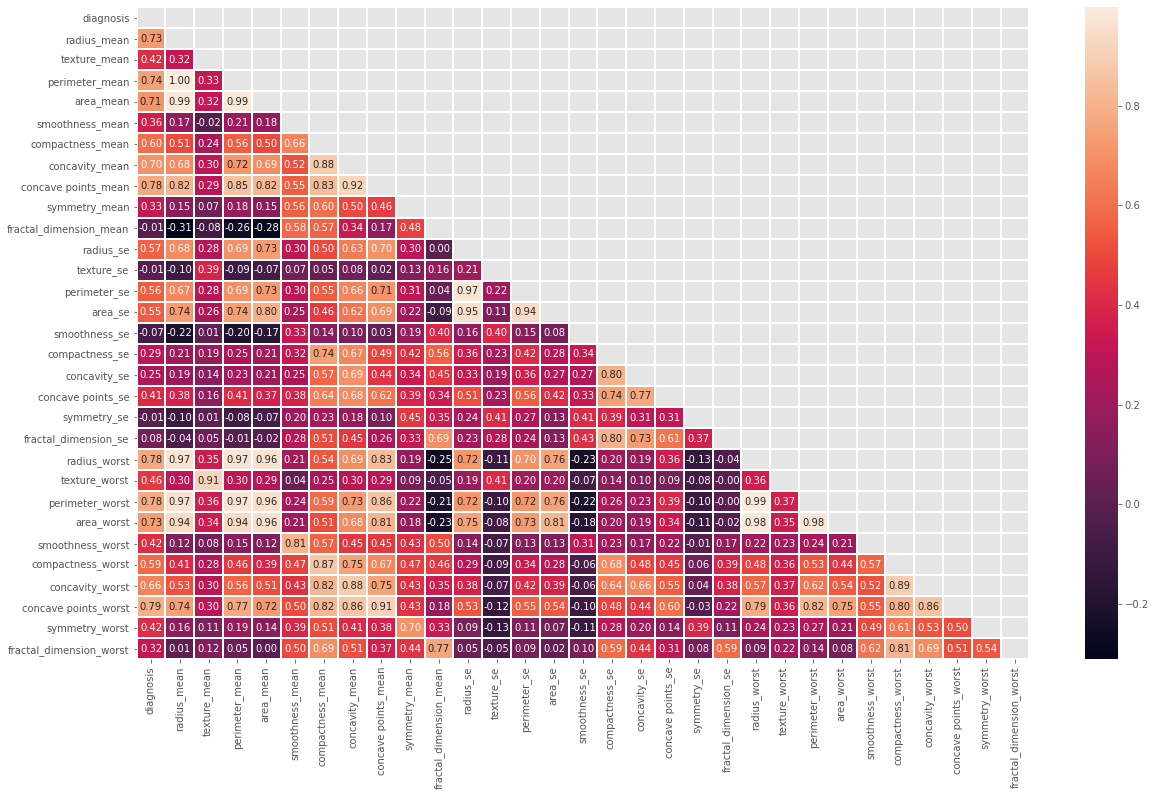

In [103]:
plt.figure(figsize = (20, 12))

corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))

sns.heatmap(corr, mask = mask, linewidths = 1, annot = True, fmt = ".2f")
plt.show()

In [104]:
corr_matrix = df[all_columns[1:]].corr()
mask = corr_matrix >= 0.9
mask

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,True,False,False,False,False,False,False
texture_mean,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
perimeter_mean,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,True,False,False,False,False,False,False
area_mean,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,True,False,False,False,False,False,False
smoothness_mean,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
compactness_mean,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
concavity_mean,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
concave points_mean,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
symmetry_mean,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
fractal_dimension_mean,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [105]:
correlated_cols = []
for column1 in all_columns[1:]:
    for column2 in all_columns[1:]:
        if corr_matrix[column1][column2] >= 0.9 and column1!=column2:
            pair = (column1, column2)
            if pair not in correlated_cols and pair[::-1] not in correlated_cols:
                correlated_cols.append(pair)

In [106]:
correlated_cols

[('radius_mean', 'perimeter_mean'),
 ('radius_mean', 'area_mean'),
 ('radius_mean', 'radius_worst'),
 ('radius_mean', 'perimeter_worst'),
 ('radius_mean', 'area_worst'),
 ('texture_mean', 'texture_worst'),
 ('perimeter_mean', 'area_mean'),
 ('perimeter_mean', 'radius_worst'),
 ('perimeter_mean', 'perimeter_worst'),
 ('perimeter_mean', 'area_worst'),
 ('area_mean', 'radius_worst'),
 ('area_mean', 'perimeter_worst'),
 ('area_mean', 'area_worst'),
 ('concavity_mean', 'concave points_mean'),
 ('concave points_mean', 'concave points_worst'),
 ('radius_se', 'perimeter_se'),
 ('radius_se', 'area_se'),
 ('perimeter_se', 'area_se'),
 ('radius_worst', 'perimeter_worst'),
 ('radius_worst', 'area_worst'),
 ('perimeter_worst', 'area_worst')]

Above are the pairs with pearson correlation value >= 0.9 We can eliminate the columns that are highly correlated with the target data.

Correlation between the categorical and continuous data can be measured using the following techniques.


1.   Logistic Regression

1.   Point Biserial Correlation
2.   T-Test or ANOVA










Using Logistic Regression for finding the correlation between categorical and continuous data

In [107]:
cols = list(set([col for i in correlated_cols for col in i]))
cols_acc = {}
for column in cols:
    X = df[column]
    y = df["diagnosis"]
    model = LogisticRegression()
    model.fit(X[:250].values.reshape(-1, 1), y[:250])
    accuracy = accuracy_score(y[250:], model.predict(X[250:].values.reshape(-1, 1)))
    cols_acc[column] = accuracy
cols_acc

{'area_mean': 0.8714733542319749,
 'area_se': 0.9153605015673981,
 'area_worst': 0.9059561128526645,
 'concave points_mean': 0.9373040752351097,
 'concave points_worst': 0.9153605015673981,
 'concavity_mean': 0.9216300940438872,
 'perimeter_mean': 0.8934169278996865,
 'perimeter_se': 0.8463949843260188,
 'perimeter_worst': 0.9153605015673981,
 'radius_mean': 0.8714733542319749,
 'radius_se': 0.8557993730407524,
 'radius_worst': 0.9059561128526645,
 'texture_mean': 0.7272727272727273,
 'texture_worst': 0.7053291536050157}

In [108]:
imp_cols = []
for col in correlated_cols:
    scores = [cols_acc[col[0]], cols_acc[col[1]]]
    req_col = col[scores.index(max(scores))]
    if req_col not in imp_cols:
        imp_cols.append(req_col)
imp_cols

['perimeter_mean',
 'radius_mean',
 'radius_worst',
 'perimeter_worst',
 'area_worst',
 'texture_mean',
 'concave points_mean',
 'radius_se',
 'area_se']

In [109]:
df.shape
final_df = df.copy()
final_df.shape

(569, 31)

In [110]:
for col in cols:
    if col not in imp_cols:
        final_df.drop(columns=col, inplace = True)
final_df.shape

(569, 26)

In [111]:
final_df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,smoothness_mean,compactness_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,0.11840,0.27760,0.14710,0.2419,0.07871,1.0950,0.9053,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,184.60,2019.0,0.1622,0.6656,0.7119,0.4601,0.11890
1,1,20.57,17.77,132.90,0.08474,0.07864,0.07017,0.1812,0.05667,0.5435,0.7339,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,158.80,1956.0,0.1238,0.1866,0.2416,0.2750,0.08902
2,1,19.69,21.25,130.00,0.10960,0.15990,0.12790,0.2069,0.05999,0.7456,0.7869,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,152.50,1709.0,0.1444,0.4245,0.4504,0.3613,0.08758
3,1,11.42,20.38,77.58,0.14250,0.28390,0.10520,0.2597,0.09744,0.4956,1.1560,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,98.87,567.7,0.2098,0.8663,0.6869,0.6638,0.17300
4,1,20.29,14.34,135.10,0.10030,0.13280,0.10430,0.1809,0.05883,0.7572,0.7813,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,152.20,1575.0,0.1374,0.2050,0.4000,0.2364,0.07678


In [112]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   smoothness_mean          569 non-null    float64
 5   compactness_mean         569 non-null    float64
 6   concave points_mean      569 non-null    float64
 7   symmetry_mean            569 non-null    float64
 8   fractal_dimension_mean   569 non-null    float64
 9   radius_se                569 non-null    float64
 10  texture_se               569 non-null    float64
 11  area_se                  569 non-null    float64
 12  smoothness_se            569 non-null    float64
 13  compactness_se           569 non-null    float64
 14  concavity_se             5

In [113]:
X = df[df.columns[1:]]
y = df["diagnosis"]

Splitting the data for training and testing 

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y, test_size = 0.2, random_state = 0)
print(f"Train Data: {X_train.shape}, {y_train.shape}")
print(f"Test Data: {X_test.shape}, {y_test.shape}")

Train Data: (455, 30), (455,)
Test Data: (114, 30), (114,)


Logistic Regression

In [115]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
print(accuracy_score(y_train, log_reg.predict(X_train)))


0.9516483516483516


In [116]:
log_reg_acc = accuracy_score(y_test, log_reg.predict(X_test))
print(log_reg_acc)

0.9473684210526315


In [117]:
print(confusion_matrix(y_test, y_pred))

[[63  4]
 [ 2 45]]


In [118]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95        67
           1       0.92      0.96      0.94        47

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.95       114
weighted avg       0.95      0.95      0.95       114



Support Vector Classifier (SVC)

Accuracy on Test Data: 98.24561403508771%
Precision Score: 1.0
Recall Score: 0.9574468085106383
F1 Score: 0.9782608695652174


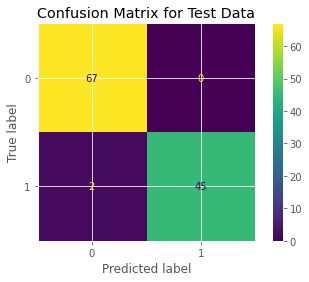


Accuracy on whole Data
Accuracy on Whole Data: 98.41827768014059%
Precision Score: 0.9951219512195122
Recall Score: 0.9622641509433962
F1 Score: 0.9784172661870504


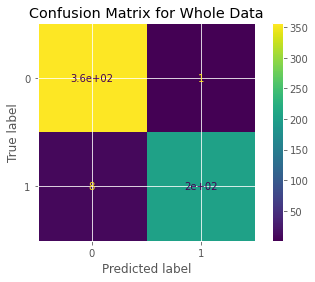

In [119]:
svm_pipeline = make_pipeline(StandardScaler(), SVC(probability=True))
svm_pipeline.fit(X_train, y_train)

# Accuray On Test Data
predictions = svm_pipeline.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy on Test Data: {accuracy*100}%")
print(f"Precision Score: {precision_score(y_test, predictions)}")
print(f"Recall Score: {recall_score(y_test, predictions)}")
print(f"F1 Score: {f1_score(y_test, predictions)}")
plot_confusion_matrix(svm_pipeline, X_test, y_test)
plt.title("Confusion Matrix for Test Data")
plt.show()

print()

# Accuray On Whole Data
print("Accuracy on whole Data")
predictions = svm_pipeline.predict(X.values)
accuracy = accuracy_score(y, predictions)
print(f"Accuracy on Whole Data: {accuracy*100}%")
print(f"Precision Score: {precision_score(y, predictions)}")
print(f"Recall Score: {recall_score(y, predictions)}")
print(f"F1 Score: {f1_score(y, predictions)}")
plot_confusion_matrix(svm_pipeline, X.values, y)
plt.title("Confusion Matrix for Whole Data")
plt.show()

In [120]:
print(classification_report(y, predictions))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       357
           1       1.00      0.96      0.98       212

    accuracy                           0.98       569
   macro avg       0.99      0.98      0.98       569
weighted avg       0.98      0.98      0.98       569



Accuracy on Test Data: 97.36842105263158%
Precision Score: 0.9782608695652174
Recall Score: 0.9574468085106383
F1 Score: 0.967741935483871


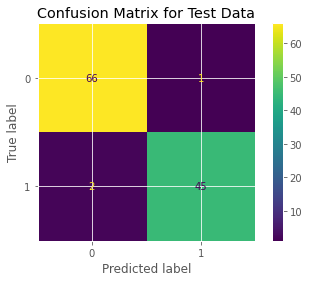

Accuracy on whole data
Accuracy on Whole Data: 99.47275922671353%
Precision Score: 0.995260663507109
Recall Score: 0.9905660377358491
F1 Score: 0.9929078014184397


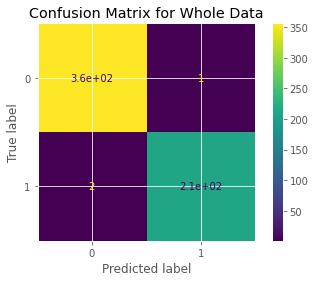

In [121]:
xgb_pipeline = make_pipeline(StandardScaler(), XGBClassifier(random_state = 18))
xgb_pipeline.fit(X_train, y_train)

# Accuray On Test Data
predictions = xgb_pipeline.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy on Test Data: {accuracy*100}%")
print(f"Precision Score: {precision_score(y_test, predictions)}")
print(f"Recall Score: {recall_score(y_test, predictions)}")
print(f"F1 Score: {f1_score(y_test, predictions)}")
plot_confusion_matrix(xgb_pipeline, X_test, y_test)
plt.title("Confusion Matrix for Test Data")
plt.show()

print("Accuracy on whole data")

# Accuray On Whole Data
predictions = xgb_pipeline.predict(X.values)
accuracy = accuracy_score(y, predictions)
print(f"Accuracy on Whole Data: {accuracy*100}%")
print(f"Precision Score: {precision_score(y, predictions)}")
print(f"Recall Score: {recall_score(y, predictions)}")
print(f"F1 Score: {f1_score(y, predictions)}")
plot_confusion_matrix(xgb_pipeline, X.values, y)
plt.title("Confusion Matrix for Whole Data")
plt.show()

In [122]:
print(classification_report(y, predictions))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       357
           1       1.00      0.99      0.99       212

    accuracy                           0.99       569
   macro avg       0.99      0.99      0.99       569
weighted avg       0.99      0.99      0.99       569



Accuracy on Test Data: 98.24561403508771%
Precision Score: 1.0
Recall Score: 0.9574468085106383
F1 Score: 0.9782608695652174


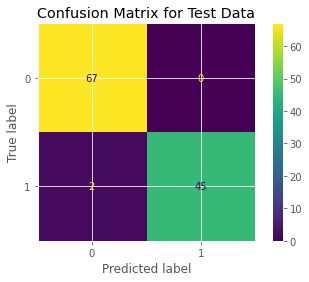


Accuracy on whole Data
Accuracy on Whole Data: 98.41827768014059%
Precision Score: 0.9951219512195122
Recall Score: 0.9622641509433962
F1 Score: 0.9784172661870504


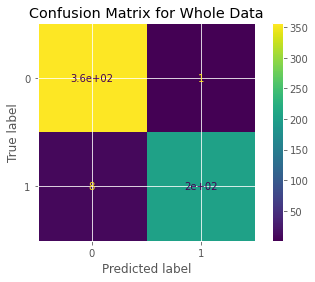

In [123]:
lr_pipeline = make_pipeline(StandardScaler(), LogisticRegression())
lr_pipeline.fit(X_train, y_train)

# Accuray On Test Data
predictions = svm_pipeline.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy on Test Data: {accuracy*100}%")
print(f"Precision Score: {precision_score(y_test, predictions)}")
print(f"Recall Score: {recall_score(y_test, predictions)}")
print(f"F1 Score: {f1_score(y_test, predictions)}")
plot_confusion_matrix(svm_pipeline, X_test, y_test)
plt.title("Confusion Matrix for Test Data")
plt.show()

print()

# Accuray On Whole Data
print("Accuracy on whole Data")
predictions = svm_pipeline.predict(X.values)
accuracy = accuracy_score(y, predictions)
print(f"Accuracy on Whole Data: {accuracy*100}%")
print(f"Precision Score: {precision_score(y, predictions)}")
print(f"Recall Score: {recall_score(y, predictions)}")
print(f"F1 Score: {f1_score(y, predictions)}")
plot_confusion_matrix(svm_pipeline, X.values, y)
plt.title("Confusion Matrix for Whole Data")
plt.show()

In [123]:
fs_df = df[['diagnosis','rad']]